In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-11-24 20:18:44.789235: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-24 20:18:44.814599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 20:18:44.814640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 20:18:44.815419: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-24 20:18:44.819902: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-24 20:18:44.820490: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
def my_softmax(z):
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """
    N = len(z)
    a = np.zeros(N)            # initialize a to zeros
    ez_sum = 0                 # initialize sum to zero
    for k in range(N):         # loop over number of outputs
        ez_sum += np.exp(z[k]) # sum exp(z[k]) to build the shared denominator
    for j in range(N):         # loop over number of outputs again
        a[j] =  np.exp(z[j])/ez_sum # divide each the exp of each output by the denominator
    return a

In [3]:
model = tf.keras.models.load_model('models/my_model.h5')

2023-11-24 20:18:46.519968: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 20:18:46.534185: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
# load dataset
X = np.load("data/X_kannada_MNIST_test.npz")
X = X['arr_0']
X = X.reshape(len(X),-1)

y = np.load("data/y_kannada_MNIST_test.npz")
y = y['arr_0']

In [5]:
# Shuffle the dataset
np.random.seed(42)
shuffle_indices = np.random.permutation(len(X))
X = X[shuffle_indices]
y = y[shuffle_indices]

In [6]:
random_index = np.random.randint(0,len(X))
image = X[random_index]
# display_digit(image_of_two)

prediction = model.predict(image.reshape(1,784))  # prediction

print(f" predicting a {y[random_index]}: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 76ms/step
 predicting a 0: 
[[ 16.107683   19.19491     9.883686   11.313475  -17.134962    9.716153
    6.6704307   9.705892   10.191012    6.594186 ]]
 Largest Prediction index: 1


In [7]:
prediction_p = tf.nn.softmax(prediction)

print(f"Probability vector: \n{prediction_p}")

yhat = np.argmax(prediction_p)
print(f"np.argmax(prediction_p): {yhat}")

Probability vector: 
[[4.36059423e-02 9.55677271e-01 8.63968889e-05 3.60950275e-04
  1.59385290e-16 7.30700558e-05 3.47535502e-06 7.23240810e-05
  1.17481155e-04 3.22022515e-06]]
np.argmax(prediction_p): 1


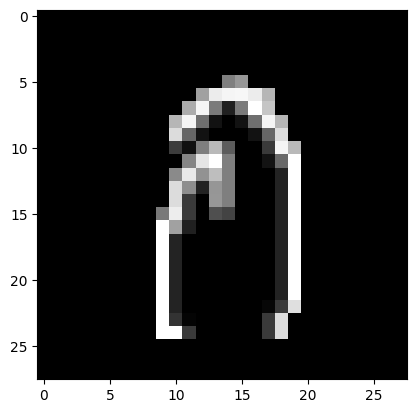

In [8]:
# Display the image
plt.imshow(image.reshape(28,28), cmap='gray')

In [9]:
correct = 0
for i in range(100):
    image = X[i]
    y_act = y[i]
    prediction = model.predict(image.reshape(1,784),verbose=0)
    y_cap = np.argmax(prediction)
    if y_cap == y_act:
        correct+=1

print("Accuracy",correct/100)

Accuracy 0.87


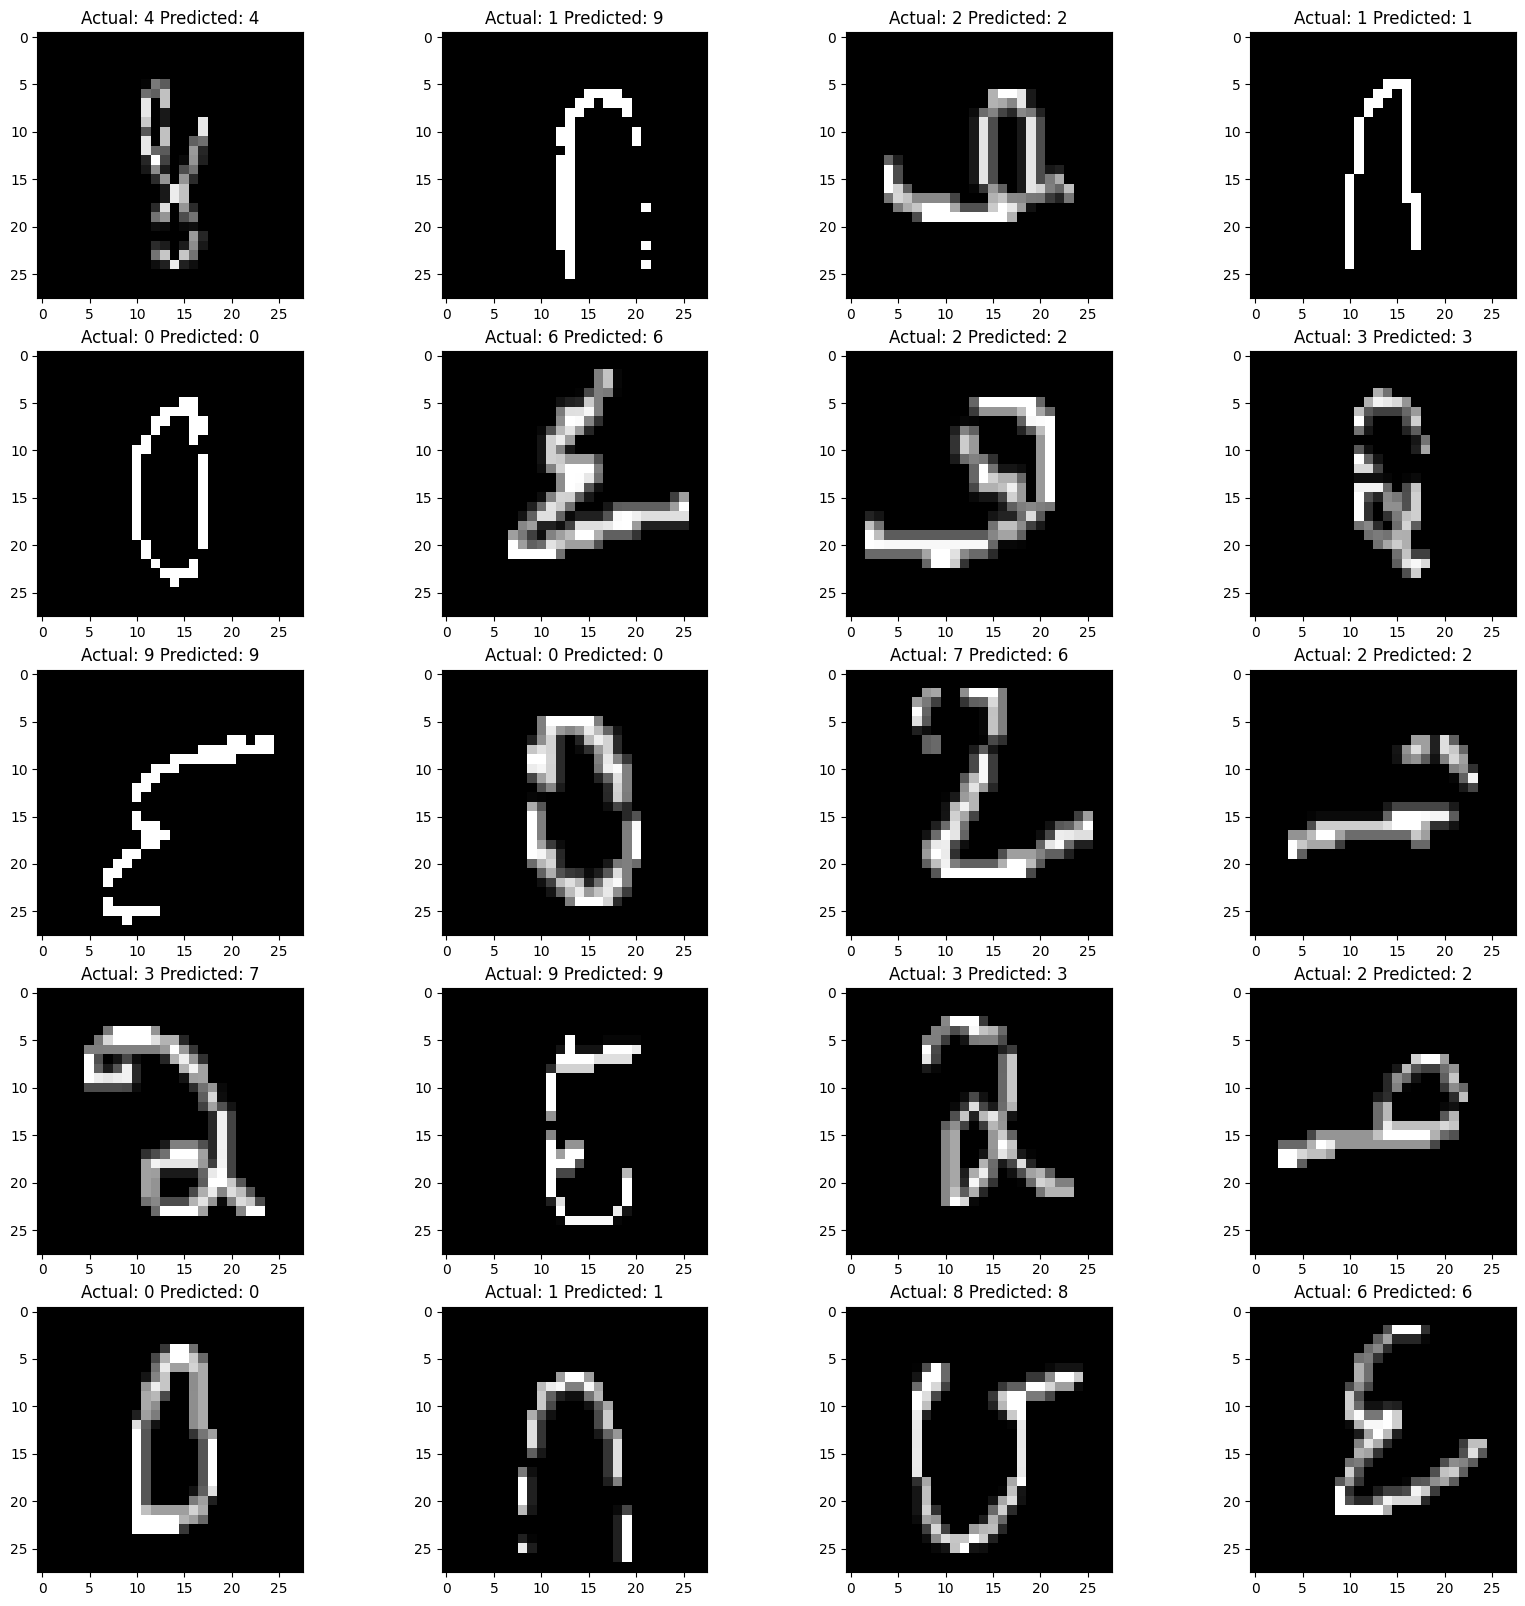

In [13]:
# Generate random 20 predictions and display in single plot with labels and predictions
# Display the image
fig = plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    image = X[i]
    y_act = y[i]
    prediction = model.predict(image.reshape(1,784),verbose=0)
    y_cap = np.argmax(prediction)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.title(f"Actual: {y_act} Predicted: {y_cap}")
plt.show()